<h1> Barra de colores personalizada

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

La barra de colores consta de un diccionario (en nuestro caso 'cdict') cuyas keys son los tres colores: azul, verde y rojo. Para cada color, se define una lista de vectores de 3 componentes.
La primera corresponde a la posición relativa de cada nueva sección en la barra, la segunda corresponde al color en que finaliza la sección anterior y la tercera el color con el que comienza esta nueva sección.

Por ejemplo si a nuestra barra le corresponde este diccionario:


In [55]:
cdict = {'blue': [(0, 0, 1), (1, 0, 0)],
'green': [(0, 0, 1), (1, 0, 0)],
'red': [(0, 0, 1),(1, 0, 0)]}

Entonces el primer vector de la lista para los 3 colores es:

'blue':(0,0,1)
'green':(0,0,1)
'red':(0,0,1)

Esto nos dice que la nueva sección arranca en la posición 0 de la barra (o sea borde inferior).

La sección anterior finaliza en el color (0,0,0) que es el negro y la nueva sección arranca en el color blanco (1,1,1)

Si miramos el segundo vector:

'blue':(1,0,0)
'green':(1,0,0)
'red':(1,0,0)

nos dice que la nueva sección comienza en la posición 1 de la barra (o sea borde superior), que la sección anterior termina en el color (0,0,0) que es el negro y que la nueva comienza en el color negro (0,0,0).

Como resultado final entonces será una barra que comienza en la posición 0 con el color blanco y finaliza en la posición 1 con el color negro.

Una vez definido el diccionario, se aplica la función:

"cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,50)"

Esta función permite identificar a la barra con un nombre que elijamos, por ejemplo "my_colormap", toma el diccionario de colores y divide la barra linealmente en la cantidad de colores que querramos (en este caso, 50)

El resultado final es entonces:

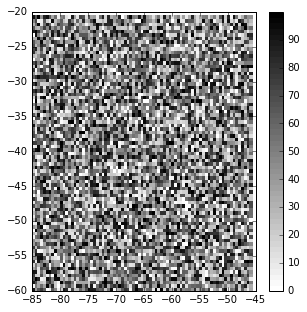

In [56]:
cdict = {'blue': [(0, 0, 1), (1, 0, 0)],
'green': [(0, 0, 1), (1, 0, 0)],
'red': [(0, 0, 1), (1, 0, 0)]}

cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,50)

Lat=np.arange(-60,-20,0.5)
Lon=np.arange(-85,-45,0.5)
Map=np.random.randint(0,100, size=(len(Lat),len(Lon)))

fig= plt.figure(figsize=(5,5))
cs=plt.pcolormesh(Lon,Lat,Map,vmin=0,vmax=100,cmap=cmap)
cbar = plt.colorbar()
cbar.set_ticks(np.arange(0,100,10))    
cbar.ax.tick_params(labelsize=10)
plt.show()

Veamos ahora como construir una barra de colores con distintos colores y discontinuidades como la de este ejemplo:

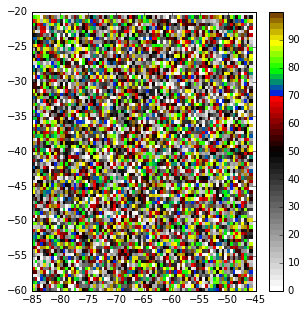

In [57]:
cdict = {'blue': [(0, 0, 1), (0.5, 0, 0), (0.7, 0, 1), (0.8, 0, 0), (0.9, 0, 0), (1, 0, 0)],
'green': [(0, 0, 1), (0.5, 0, 0), (0.7, 0, 0), (0.8, 1, 1), (0.9, 1, 1), (1, (70./255) , (70./255))],
'red': [(0, 0, 1), (0.5, 0, 0), (0.7, 1, 0), (0.8, 0, 0), (0.9, 1, 1),(1, (120./255) , (120./255))]}

cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,50)

Lat=np.arange(-60,-20,0.5)
Lon=np.arange(-85,-45,0.5)
Map=np.random.randint(0,100, size=(len(Lat),len(Lon)))

fig= plt.figure(figsize=(5,5))
cs=plt.pcolormesh(Lon,Lat,Map,vmin=0,vmax=100,cmap=cmap)
cbar = plt.colorbar()
cbar.set_ticks(np.arange(0,100,10))    
cbar.ax.tick_params(labelsize=10)
plt.show()

Contruyamos la barra desde el borde inferior hacia el borde superior.
En este ejemplo, vemos una primera sección entre 0 y 0.5 (la mitad de la barra) que comienza con el color blanco y termina en el color negro. Entonces, debemos agregar un vector a cada color con esta nueva sección:

cdict = {'blue': [(0, 0, 1), (0.5, 0, 0), (1, 0, 0)],
'green': [(0, 0, 1), (0.5, 0, 0), (1, 0, 0)],
'red': [(0, 0, 1), (0.5, 0, 0),(1, 0, 0)]}

El vector nuevo para cada color tiene la forma:

'blue': (0.5, 0, 0)
'green':(0.5, 0, 0)
'red': (0.5, 0, 0)

Esto nos indica que en 0.5 (la mitad de la barra) comienza una nueva sección. Además, nos dice que la sección 0-0.5 termina en el color negro (0,0,0) y que la nueva sección 0.5-1 comienza también en el color negro.

El resultado es entonces:


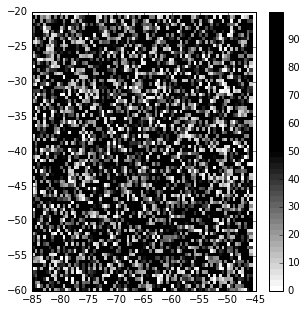

In [58]:
cdict = {'blue': [(0, 0, 1), (0.5, 0, 0), (1, 0, 0)], 
         'green': [(0, 0, 1), (0.5, 0, 0), (1, 0, 0)], 
         'red': [(0, 0, 1), (0.5, 0, 0),(1, 0, 0)]}

cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,50)

Lat=np.arange(-60,-20,0.5)
Lon=np.arange(-85,-45,0.5)
Map=np.random.randint(0,100, size=(len(Lat),len(Lon)))

fig= plt.figure(figsize=(5,5))
cs=plt.pcolormesh(Lon,Lat,Map,vmin=0,vmax=100,cmap=cmap)
cbar = plt.colorbar()
cbar.set_ticks(np.arange(0,100,10))    
cbar.ax.tick_params(labelsize=10)
plt.show()

Después podemos ver que desde 0.5 hasta 0.7, la barra varía entre negro y rojo. Entonces agregamos una nueva sección:

cdict = {'blue': [(0, 0, 1), (0.5, 0, 0), (0.7, 0, 0), (1, 0, 0)],
'green': [(0, 0, 1), (0.5, 0, 0), (0.7, 0, 0), (1, 0, 0)],
'red': [(0, 0, 1), (0.5, 0, 0), (0.7, 1, 0),(1, 0, 0)]}

El nuevo vector para cada color tiene la forma:

'blue': (0.7, 0, 0)
'green': (0.7, 0, 0)
'red': (0.7, 1, 0)

Esto nos indica que en la posición 0.7 de la barra comienza una nueva sección. Además, nos dice que la sección 0.5-0.7 termina en el color rojo (0,0,1) y que la nueva sección 0.7-1 comienza en el color negro.

El resultado es entonces:


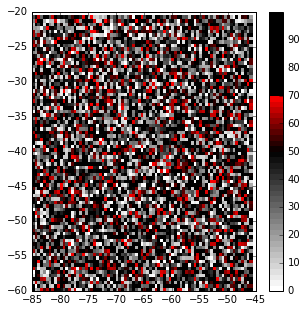

In [59]:
cdict = {'blue': [(0, 0, 1), (0.5, 0, 0), (0.7, 0, 0), (1, 0, 0)],
'green': [(0, 0, 1), (0.5, 0, 0), (0.7, 0, 0), (1, 0, 0)],
'red': [(0, 0, 1), (0.5, 0, 0), (0.7, 1, 0),(1, 0, 0)]}

cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,50)

Lat=np.arange(-60,-20,0.5)
Lon=np.arange(-85,-45,0.5)
Map=np.random.randint(0,100, size=(len(Lat),len(Lon)))

fig= plt.figure(figsize=(5,5))
cs=plt.pcolormesh(Lon,Lat,Map,vmin=0,vmax=100,cmap=cmap)
cbar = plt.colorbar()
cbar.set_ticks(np.arange(0,100,10))    
cbar.ax.tick_params(labelsize=10)
plt.show()

Para la siguiente sección, podemos ver que no comienza con el mismo color rojo con el que terminó la sección anterior, sino que comienza con azul, entonces debemos modificar el vector que agregamos recién para que la nueva sección comience con azul.

cdict = {'blue': [(0, 0, 1), (0.5, 0, 0), (0.7, 0, 1),(1, 0, 0)],
'green': [(0, 0, 1), (0.5, 0, 0), (0.7, 0, 0), (1, 0, 0)],
'red': [(0, 0, 1), (0.5, 0, 0), (0.7, 1, 0),(1, 0, 0)]}

Entonces el nuevo vector para la sección 0.7 es:

'blue': (0.7, 0, 1)
'green': (0.7, 0, 0)
'red': (0.7, 1, 0)

La sección 0.5-0.7 termina en el color rojo (0,0,1) pero la sección 0.7-1 comienza en el color azul (1,0,0)

El resultado es entonces:

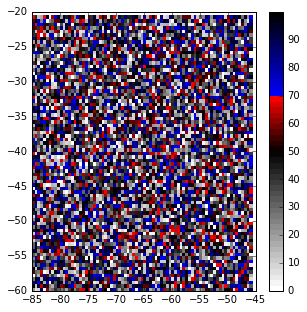

In [60]:
cdict = {'blue': [(0, 0, 1), (0.5, 0, 0), (0.7, 0, 1), (1, 0, 0)],
'green': [(0, 0, 1), (0.5, 0, 0), (0.7, 0, 0),(1, 0, 0)],
'red': [(0, 0, 1), (0.5, 0, 0), (0.7, 1, 0),(1, 0, 0)]}

cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,50)

Lat=np.arange(-60,-20,0.5)
Lon=np.arange(-85,-45,0.5)
Map=np.random.randint(0,100, size=(len(Lat),len(Lon)))

fig= plt.figure(figsize=(5,5))
cs=plt.pcolormesh(Lon,Lat,Map,vmin=0,vmax=100,cmap=cmap)
cbar = plt.colorbar()
cbar.set_ticks(np.arange(0,100,10))    
cbar.ax.tick_params(labelsize=10)
plt.show()

Sigamos con la siguiente sección. Entre 0.7 y 0.8 varía entre azul y verde. Además podemos ver que la siguiente sección entre 0.8 y 0.9 también comienza con verde. Agregando el vector correspondiente sería:

cdict = {'blue': [(0, 0, 1), (0.5, 0, 0), (0.7, 0, 1), (0.8, 0, 0), (1, 0, 0)],
'green': [(0, 0, 1), (0.5, 0, 0), (0.7, 0, 0), (0.8, 1, 1), (1, 0, 0)],
'red': [(0, 0, 1), (0.5, 0, 0), (0.7, 1, 0), (0.8, 0, 0),(1, 0, 0)]}

El resultado es entonces:

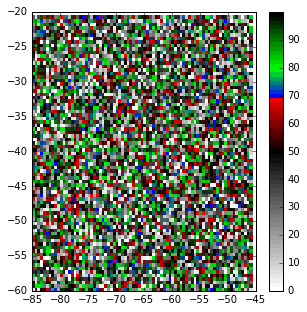

In [61]:
cdict = {'blue': [(0, 0, 1), (0.5, 0, 0), (0.7, 0, 1), (0.8, 0, 0), (1, 0, 0)],
'green': [(0, 0, 1), (0.5, 0, 0), (0.7, 0, 0), (0.8, 1, 1), (1, 0, 0)],
'red': [(0, 0, 1), (0.5, 0, 0), (0.7, 1, 0), (0.8, 0, 0),(1, 0, 0)]}

cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,65)

Lat=np.arange(-60,-20,0.5)
Lon=np.arange(-85,-45,0.5)
Map=np.random.randint(0,100, size=(len(Lat),len(Lon)))

fig= plt.figure(figsize=(5,5))
cs=plt.pcolormesh(Lon,Lat,Map,vmin=0,vmax=100,cmap=cmap)
cbar = plt.colorbar()
cbar.set_ticks(np.arange(0,100,10))    
cbar.ax.tick_params(labelsize=10)
plt.show()

La sección entre 0.8 y 0.9 termina con el color amarillo (0,1,1), asi como también comienza con amarillo la sección 0.9 y 1.
Agregando el vector correspondiente para cada color:

cdict = {'blue': [(0, 0, 1), (0.5, 0, 0), (0.7, 0, 1), (0.8, 0, 0), (0.9, 0, 0), (1, 0, 0)],
'green': [(0, 0, 1), (0.5, 0, 0), (0.7, 0, 0), (0.8, 1, 1), (0.9, 1, 1), (1, 0, 0)],
'red': [(0, 0, 1), (0.5, 0, 0), (0.7, 1, 0), (0.8, 0, 0), (0.9, 1, 1),(1, 0, 0)]}

El resultado es entonces:

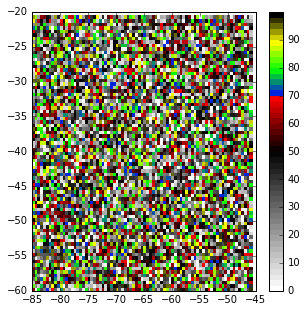

In [62]:
cdict = {'blue': [(0, 0, 1), (0.5, 0, 0), (0.7, 0, 1), (0.8, 0, 0), (0.9, 0, 0), (1, 0, 0)],
'green': [(0, 0, 1), (0.5, 0, 0), (0.7, 0, 0), (0.8, 1, 1), (0.9, 1, 1), (1, 0, 0)],
'red': [(0, 0, 1), (0.5, 0, 0), (0.7, 1, 0), (0.8, 0, 0), (0.9, 1, 1),(1, 0, 0)]}

cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,50)

Lat=np.arange(-60,-20,0.5)
Lon=np.arange(-85,-45,0.5)
Map=np.random.randint(0,100, size=(len(Lat),len(Lon)))

fig= plt.figure(figsize=(5,5))
cs=plt.pcolormesh(Lon,Lat,Map,vmin=0,vmax=100,cmap=cmap)
cbar = plt.colorbar()
cbar.set_ticks(np.arange(0,100,10))    
cbar.ax.tick_params(labelsize=10)
plt.show()

Agreguemos ahora el último color de la barra.

Generalmente para definir los colores se asigna un valor entre 0 y 255 a cada color (rojo, verde, azul) según cuanto interviene en la mezcla.

Por ejemplo, 

- el color blanco es (255,255,255)
- el color negro es (0,0,0)
- el azul es (0,0,255)
- el amarillo es (255,255,0)

Para armar este diccionario las contribuciones de cada color se pesan con valores de 0 a 1.
Entonces por ejemplo, el color amarillo (255,255,0) se escribe como (1,1,0).

Por lo tanto, si definimos un color como (120,70,0) en el diccionario se ingresa dividiendo cada número por 255

Entonces, si agregamos este color a la última sección, el diccionario final es:

cdict = {'blue': [(0, 0, 1), (0.5, 0, 0), (0.7, 0, 1), (0.8, 0, 0), (0.9, 0, 0), (1, 0, 0)],
'green': [(0, 0, 1), (0.5, 0, 0), (0.7, 0, 0), (0.8, 1, 1), (0.9, 1, 1), (1, (70./255) , (70./255))],
'red': [(0, 0, 1), (0.5, 0, 0), (0.7, 1, 0), (0.8, 0, 0), (0.9, 1, 1),(1, (120./255) , (120./255))]}

El resultado final es entonces:


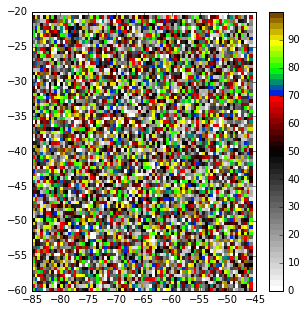

In [63]:
cdict = {'blue': [(0, 0, 1), (0.5, 0, 0), (0.7, 0, 1), (0.8, 0, 0), (0.9, 0, 0), (1, 0, 0)],
'green': [(0, 0, 1), (0.5, 0, 0), (0.7, 0, 0), (0.8, 1, 1), (0.9, 1, 1), (1, (70./255) , (70./255))],
'red': [(0, 0, 1), (0.5, 0, 0), (0.7, 1, 0), (0.8, 0, 0), (0.9, 1, 1),(1, (120./255) , (120./255))]}

cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,50)

Lat=np.arange(-60,-20,0.5)
Lon=np.arange(-85,-45,0.5)
Map=np.random.randint(0,100, size=(len(Lat),len(Lon)))

fig= plt.figure(figsize=(5,5))
cs=plt.pcolormesh(Lon,Lat,Map,vmin=0,vmax=100,cmap=cmap)
cbar = plt.colorbar()
cbar.set_ticks(np.arange(0,100,10))    
cbar.ax.tick_params(labelsize=10)
plt.show()

También puede modificarse la cantidad de colores en que es dividida la barra:

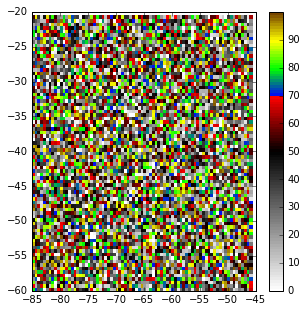

In [64]:
cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,100)
fig= plt.figure(figsize=(5,5))
cs=plt.pcolormesh(Lon,Lat,Map,vmin=0,vmax=100,cmap=cmap)
cbar = plt.colorbar()
cbar.set_ticks(np.arange(0,100,10))    
cbar.ax.tick_params(labelsize=10)
plt.show()

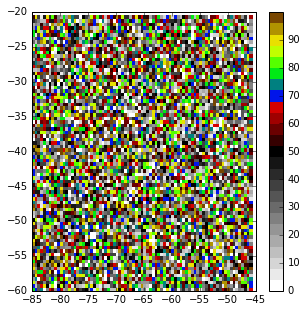

In [65]:
cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,25)
fig= plt.figure(figsize=(5,5))
cs=plt.pcolormesh(Lon,Lat,Map,vmin=0,vmax=100,cmap=cmap)
cbar = plt.colorbar()
cbar.set_ticks(np.arange(0,100,10))    
cbar.ax.tick_params(labelsize=10)
plt.show()

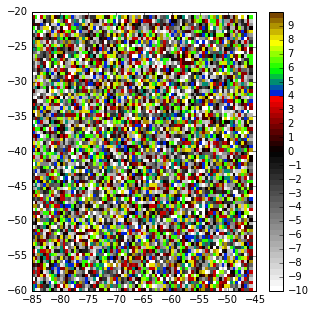

In [68]:
cdict = {'blue': [(0, 0, 1), (0.5, 0, 0), (0.7, 0, 1), (0.8, 0, 0), (0.9, 0, 0), (1, 0, 0)],
'green': [(0, 0, 1), (0.5, 0, 0), (0.7, 0, 0), (0.8, 1, 1), (0.9, 1, 1), (1, (70./255) , (70./255))],
'red': [(0, 0, 1), (0.5, 0, 0), (0.7, 1, 0), (0.8, 0, 0), (0.9, 1, 1),(1, (120./255) , (120./255))]}

cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,50)

Lat=np.arange(-60,-20,0.5)
Lon=np.arange(-85,-45,0.5)
Map=np.random.randint(-10,10, size=(len(Lat),len(Lon)))

fig= plt.figure(figsize=(5,5))
cs=plt.pcolormesh(Lon,Lat,Map,vmin=-10,vmax=10,cmap=cmap)
cbar = plt.colorbar()
cbar.set_ticks(np.arange(-10,10,1))    
cbar.ax.tick_params(labelsize=10)
plt.show()